# Proyecto individual 01 - Exploratory Data Analysis (EDA)

In [179]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import ssl

Waypoints for exploratory data analysis (EDA):

- Get a basic understanding of the dataframe: Check the shape of the dataframe, the data types of each column, and the summary statistics of the numeric columns.

- Handle missing data: Check for missing data in the dataframe and decide on a strategy to handle them.

- Univariate analysis: For each column, create visualizations to get an understanding of the distribution of the data.

- Bivariate analysis: Create visualizations to understand the relationship between two variables.

- Correlation analysis: Check the correlation between different variables using a correlation matrix or a heatmap.

- Outlier analysis: Check for outliers in the data and decide on a strategy to handle them.

- Feature engineering: Create new features that may be useful for the analysis, such as extracting the release year or the month from the release date column.

In [15]:
df = pd.read_csv('my_data.csv')

In [16]:
df.head(3)

,id,title,original_language,overview,popularity,release_date,budget,revenue,runtime,status,...,id_collection,collection_name,genres,production_companies,spoken_languages,production_countries,release_year,return,month,day
0,862,toy story,en,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,30000000,373554033,81.0,released,...,10194.0,toy story collection,"animation, comedy, family",pixar animation studios,en,us,1995,12.45,october,monday
1,8844,jumanji,en,when siblings judy and peter discover an encha...,17.015539,1995-12-15,65000000,262797249,104.0,released,...,NaN,NaN,"adventure, fantasy, family","tristar pictures, teitler film, interscope com...","en, fr",us,1995,4.04,december,friday
2,15602,grumpier old men,en,a family wedding reignites the ancient feud be...,11.712900,1995-12-22,0,0,101.0,released,...,119050.0,grumpy old men collection,"romance, comedy","warner bros., lancaster gate",en,us,1995,0.00,december,friday


In [17]:
df.shape

(45376, 22)

In [18]:
df.dtypes

id                        int64
title                    object
original_language        object
overview                 object
popularity              float64
release_date             object
budget                    int64
revenue                   int64
runtime                 float64
status                   object
tagline                  object
vote_average            float64
id_collection           float64
collection_name          object
genres                   object
production_companies     object
spoken_languages         object
production_countries     object
release_year              int64
return                  float64
month                    object
day                      object
dtype: object

In [19]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_average,id_collection,release_year,return
count,45376.000000,45376.000000,4.537600e+04,4.537600e+04,45130.000000,45376.000000,4488.000000,45376.000000,4.537600e+04
mean,108027.103094,2.926458,4.232604e+06,1.123010e+07,94.181675,5.624070,184073.408868,1991.881193,6.600428e+02
std,112168.377996,6.009672,1.743986e+07,6.438996e+07,38.341059,1.915423,141630.530505,24.055360,7.469329e+04
min,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,10.000000,1874.000000,0.000000e+00
25%,26385.750000,0.388840,0.000000e+00,0.000000e+00,85.000000,5.000000,86026.250000,1978.000000,0.000000e+00
50%,59857.500000,1.130454,0.000000e+00,0.000000e+00,95.000000,6.000000,141531.500000,2001.000000,0.000000e+00
75%,156533.500000,3.691695,0.000000e+00,0.000000e+00,107.000000,6.800000,294172.000000,2010.000000,0.000000e+00
max,469172.000000,547.488298,3.800000e+08,2.787965e+09,1256.000000,10.000000,480160.000000,2020.000000,1.239638e+07


In [20]:
df.isna().sum()

id                          0
title                       0
original_language          11
overview                  941
popularity                  0
release_date                0
budget                      0
revenue                     0
runtime                   246
status                     80
tagline                 24978
vote_average                0
id_collection           40888
collection_name         40888
genres                   2384
production_companies    11797
spoken_languages         3768
production_countries     6211
release_year                0
return                      0
month                       0
day                         0
dtype: int64

<Axes: >

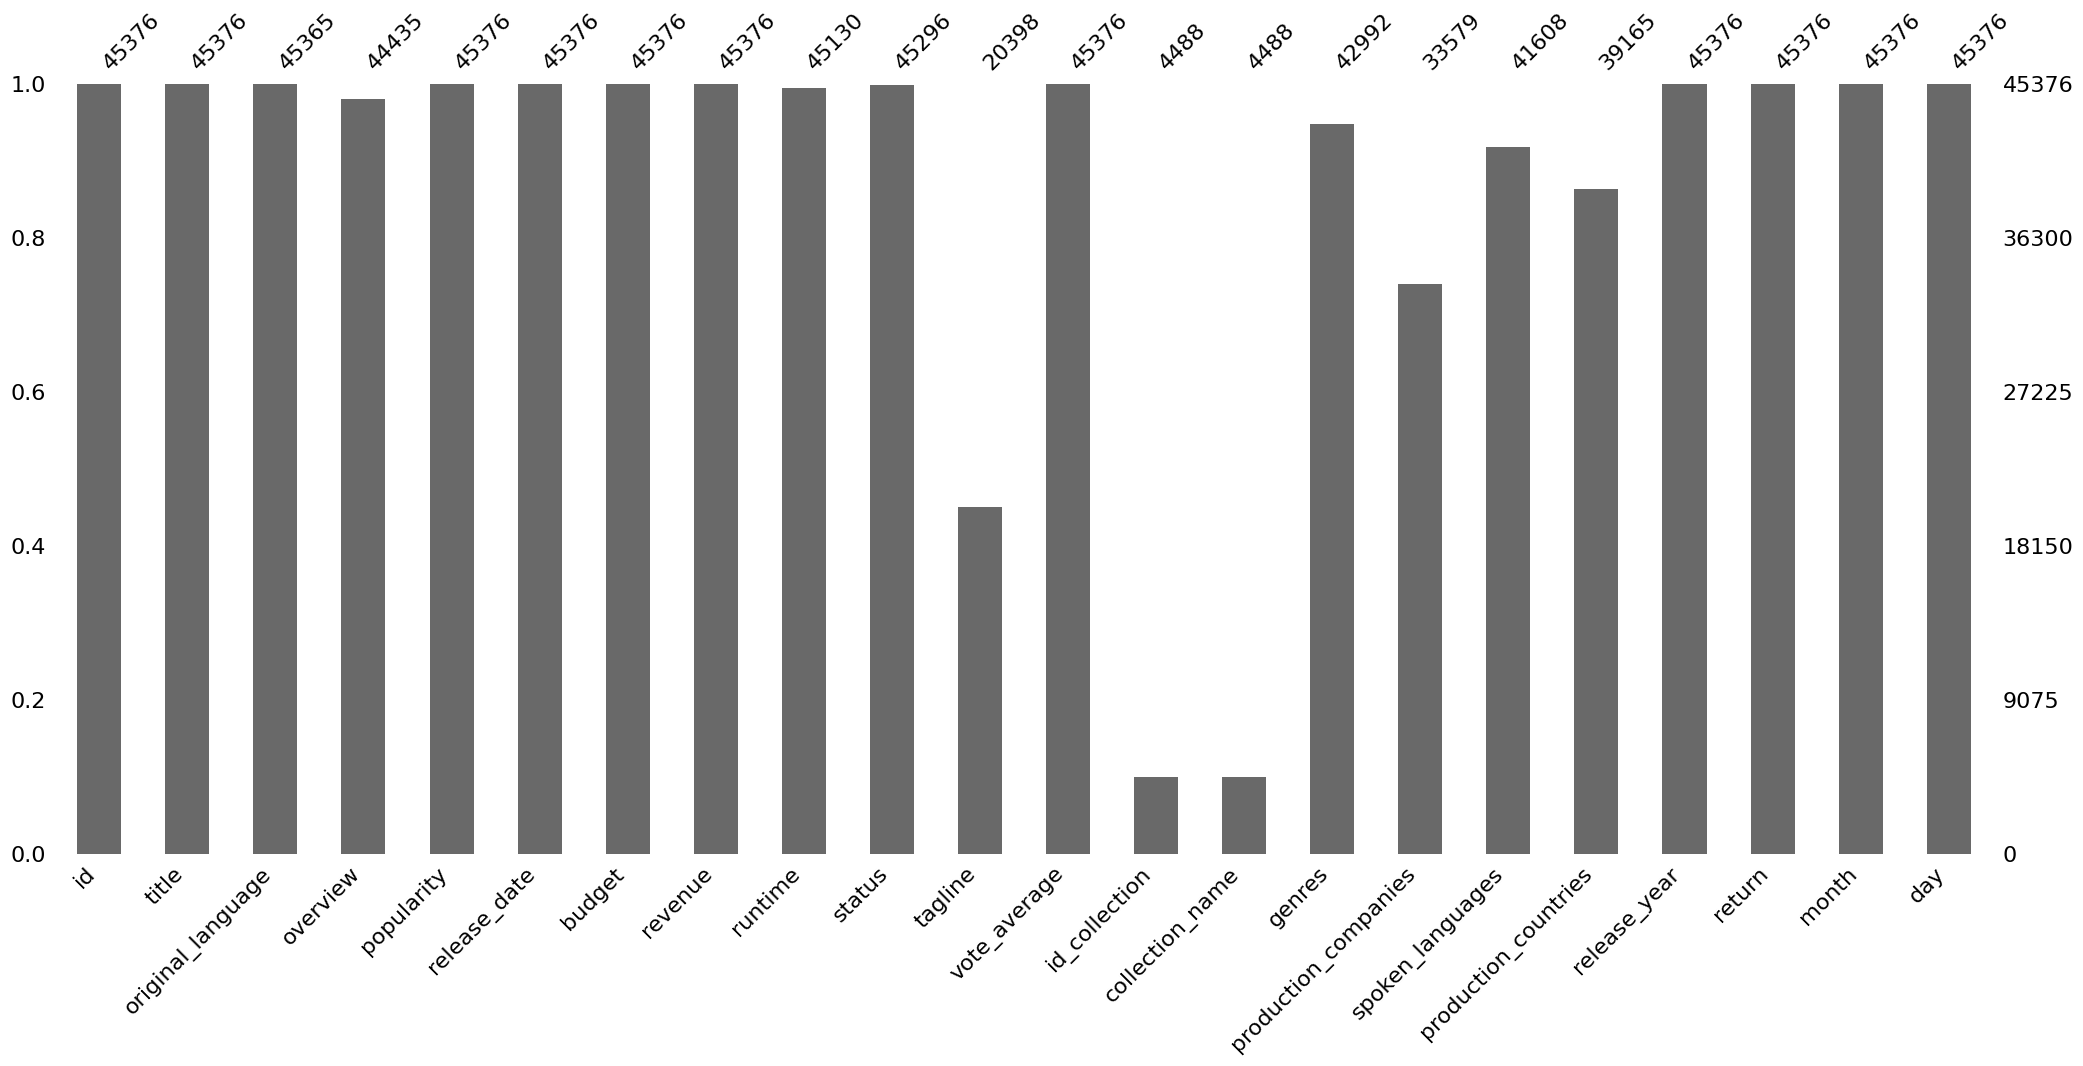

In [21]:
# Create a bar chart of missing data
msno.bar(df)

<Axes: >

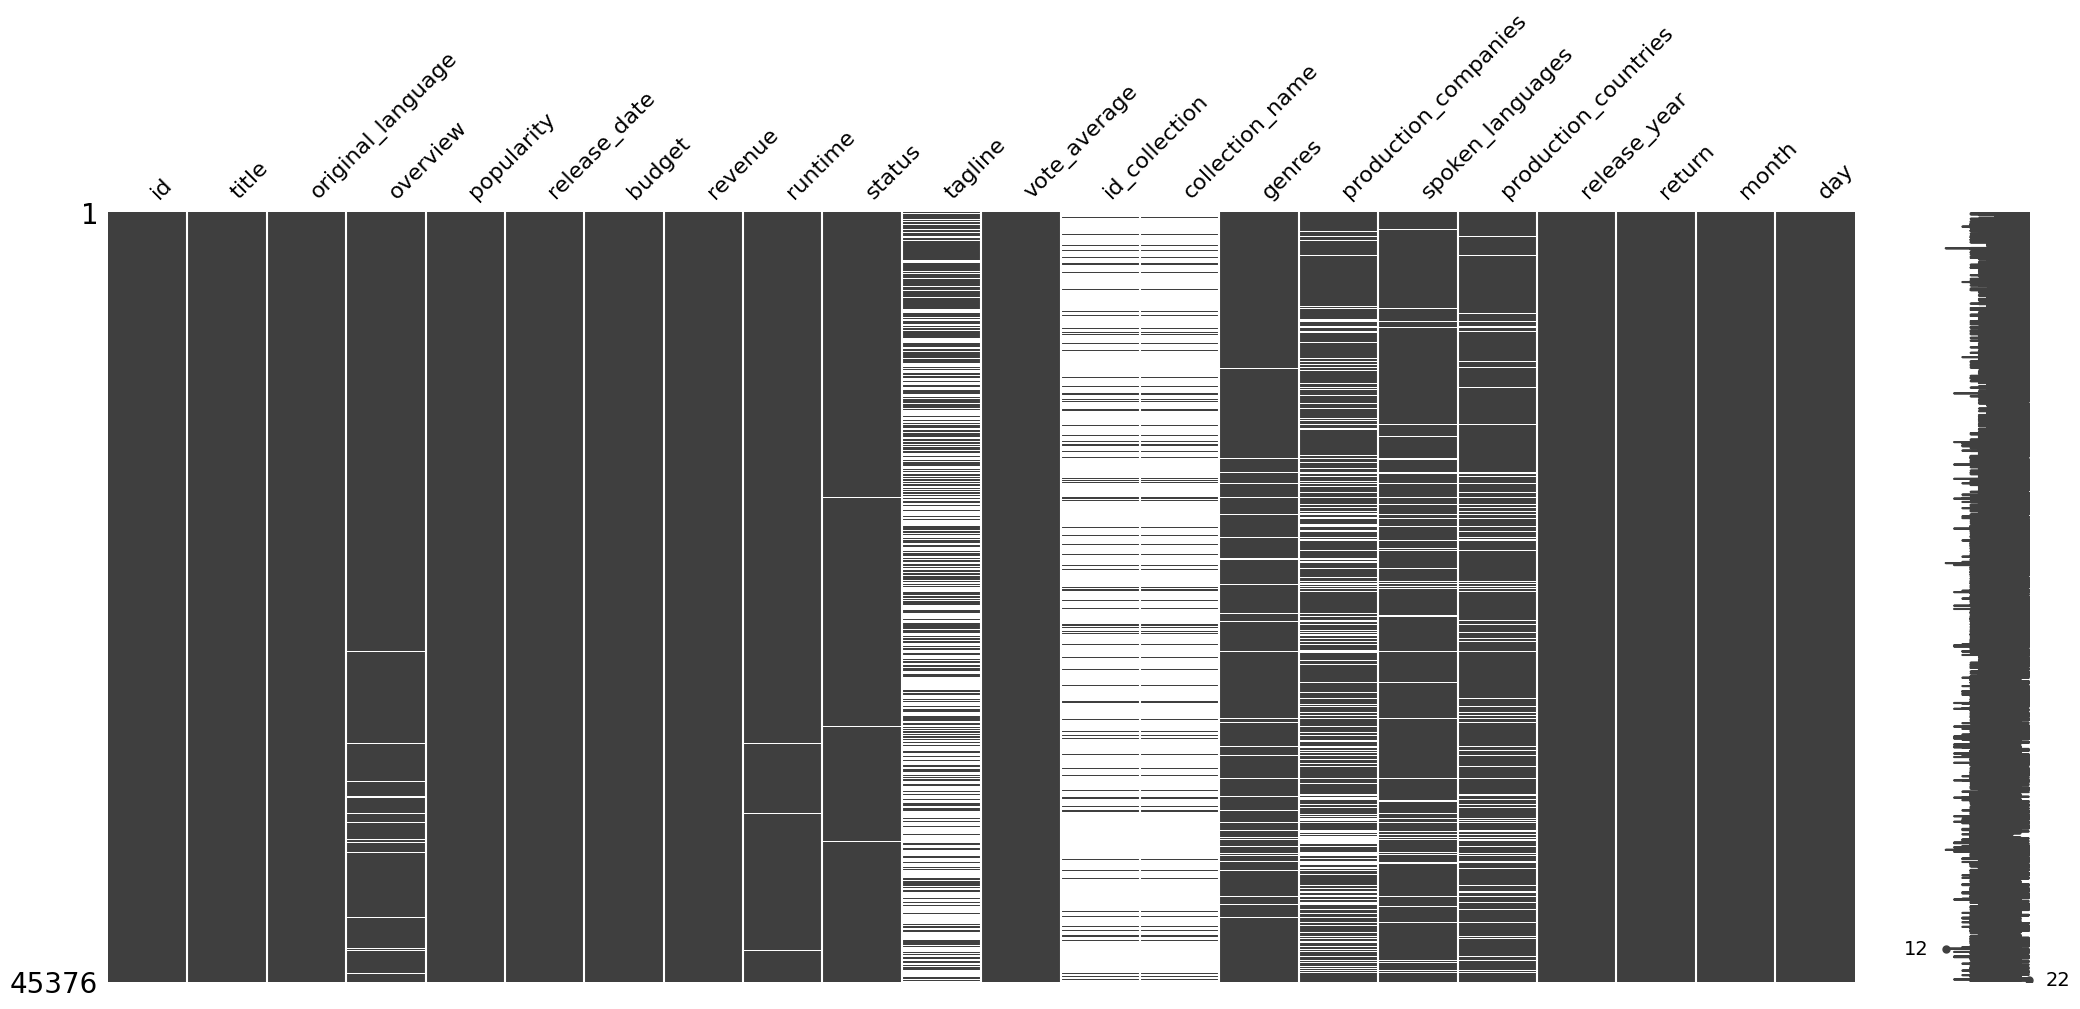

In [22]:
msno.matrix(df)

<Axes: xlabel='release_year', ylabel='Count'>

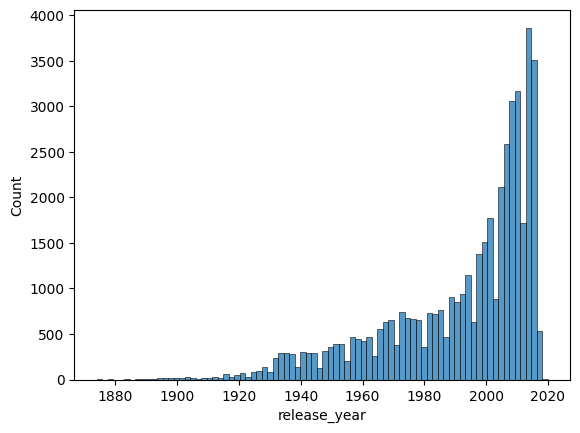

In [23]:
sns.histplot(df['release_year'])

(0.0, 300.0)

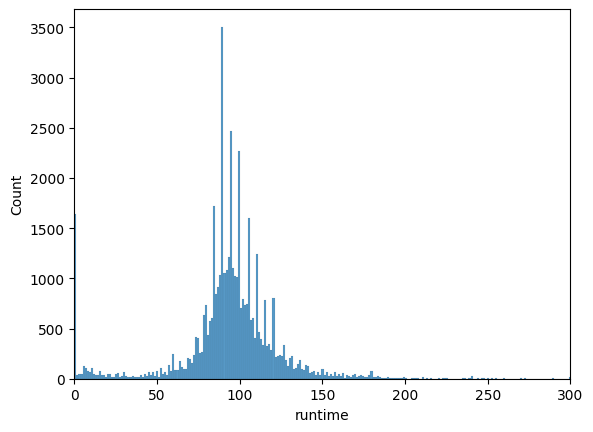

In [24]:
sns.histplot(df['runtime'])
plt.gca().set_xlim([0, 300])

(0.0, 10.0)

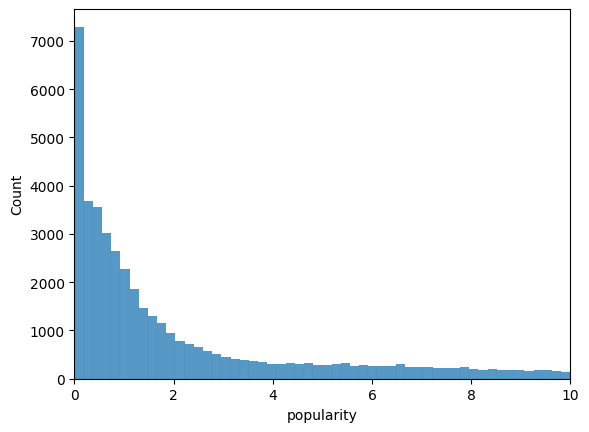

In [26]:
sns.histplot(df['popularity'])
plt.gca().set_xlim([0, 10])

(0.0, 20.0)

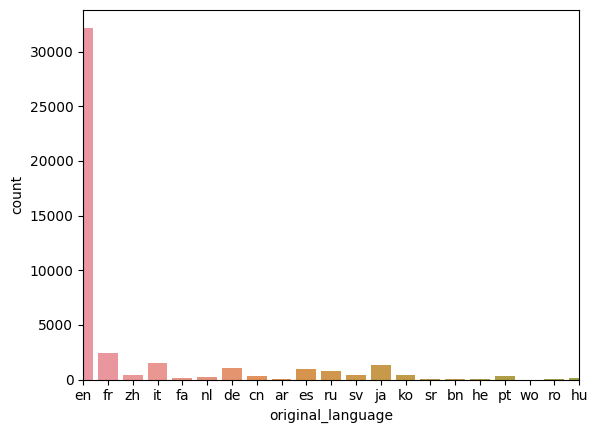

In [27]:
sns.countplot(data=df, x='original_language')
plt.gca().set_xlim([0, 20])


In [77]:
prod_count = df['production_companies'].explode().value_counts()
prod_count = pd.DataFrame(prod_count)
top_20 = prod_count[:20]
top_20 = top_20.reset_index().rename(columns={'production_companies': 'number_of_movies'}).rename(columns={'index': 'production_companies'})

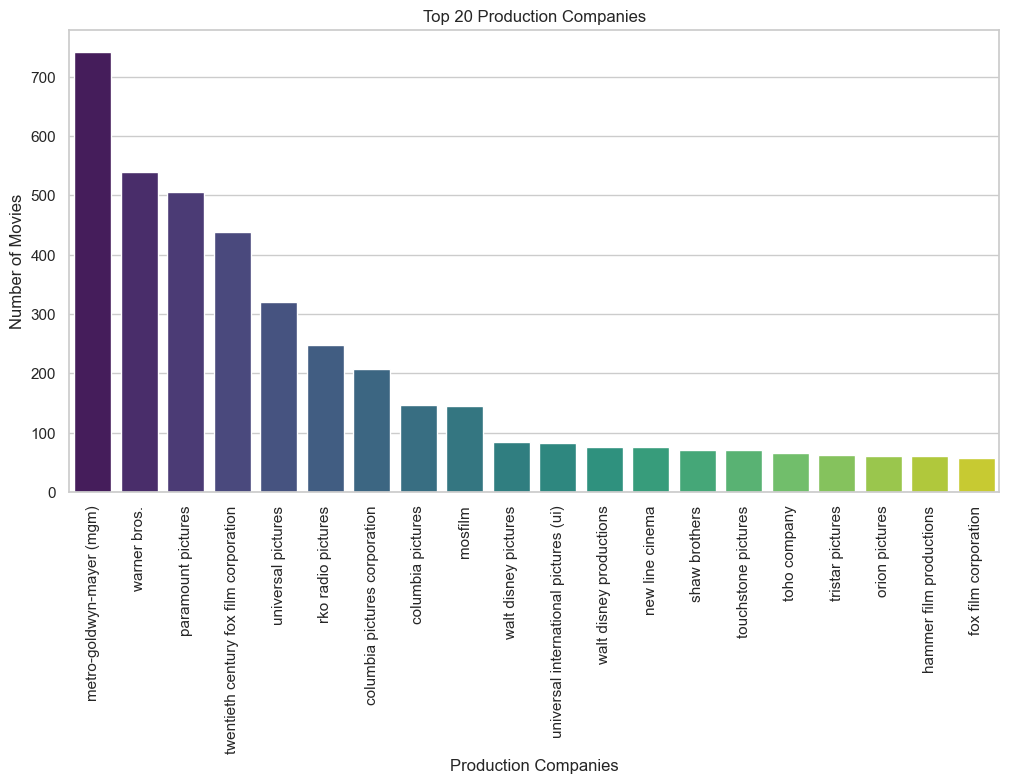

In [80]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_20, x='production_companies', y='number_of_movies', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Production Companies')
plt.ylabel('Number of Movies')
plt.title('Top 20 Production Companies')
plt.show()

In [88]:
genres_count = df['genres'].explode().value_counts()
genres_count = pd.DataFrame(genres_count)
top_20 = genres_count[:20]
top_20 = top_20.reset_index().rename(columns={'genres': 'number_of_movies'}).rename(columns={'index': 'genres'})

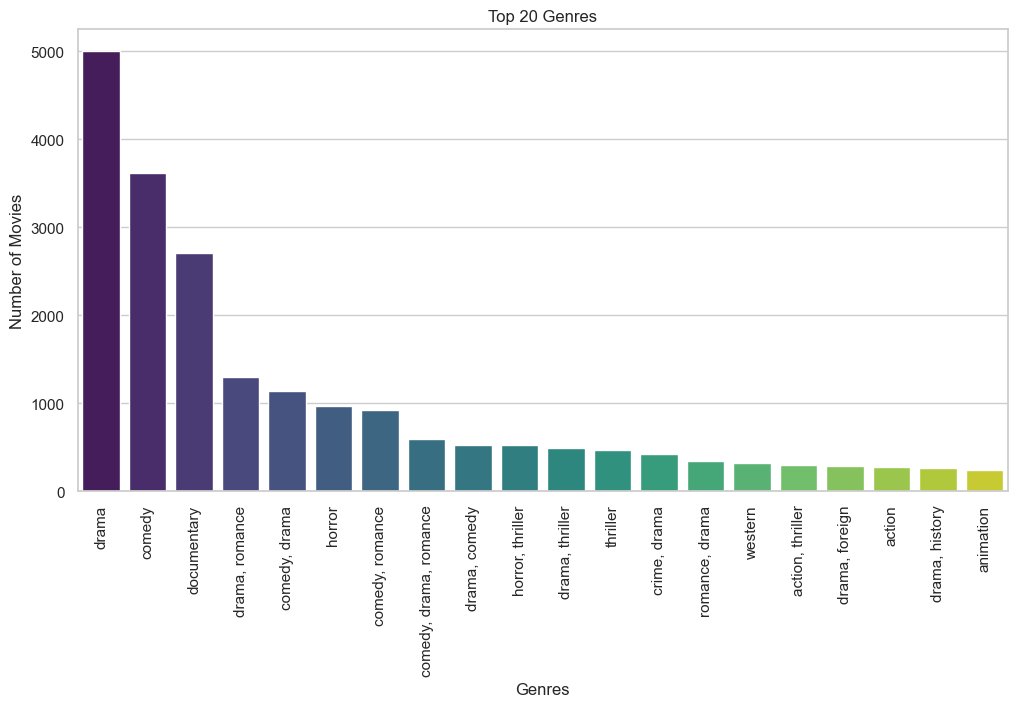

In [89]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_20, x='genres', y='number_of_movies', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Top 20 Genres')
plt.show()

In [90]:
language_count = df['spoken_languages'].explode().value_counts()
language_count = pd.DataFrame(language_count)
top_20 = language_count[:20]
top_20 = top_20.reset_index().rename(columns={'spoken_languages': 'number_of_movies'}).rename(columns={'index': 'spoken_languages'})

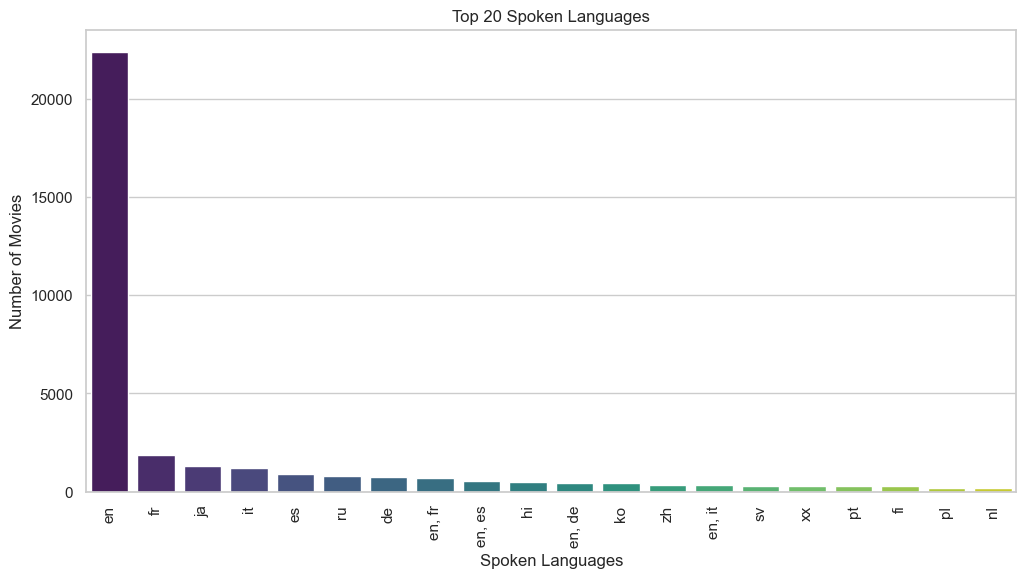

In [91]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_20, x='spoken_languages', y='number_of_movies', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Spoken Languages')
plt.ylabel('Number of Movies')
plt.title('Top 20 Spoken Languages')
plt.show()

In [92]:
country_count = df['production_countries'].explode().value_counts()
country_count = pd.DataFrame(country_count)
top_20 = country_count[:20]
top_20 = top_20.reset_index().rename(columns={'production_countries': 'number_of_movies'}).rename(columns={'index': 'production_countries'})

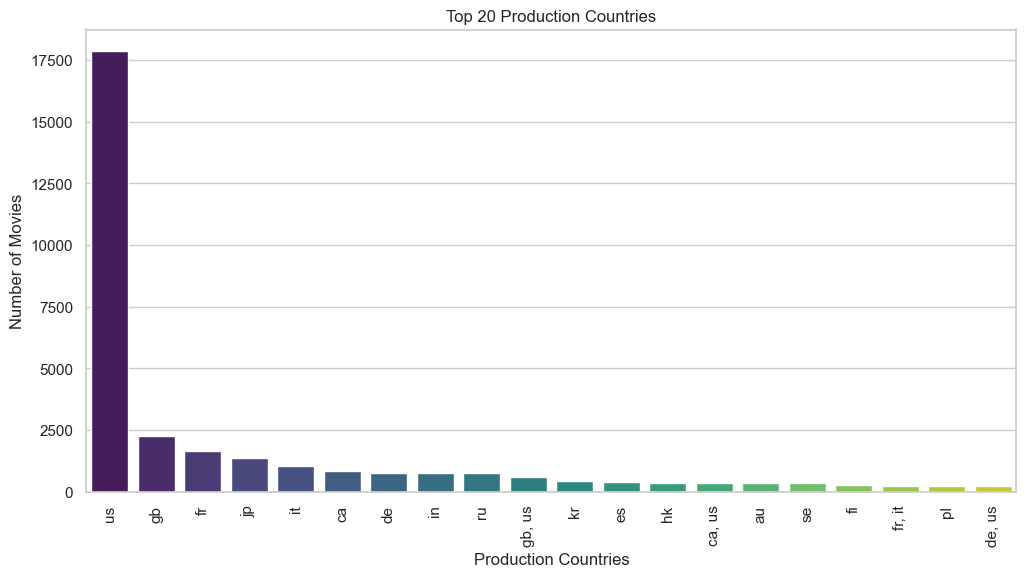

In [93]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_20, x='production_countries', y='number_of_movies', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Production Countries')
plt.ylabel('Number of Movies')
plt.title('Top 20 Production Countries')
plt.show()

<Axes: xlabel='budget', ylabel='revenue'>

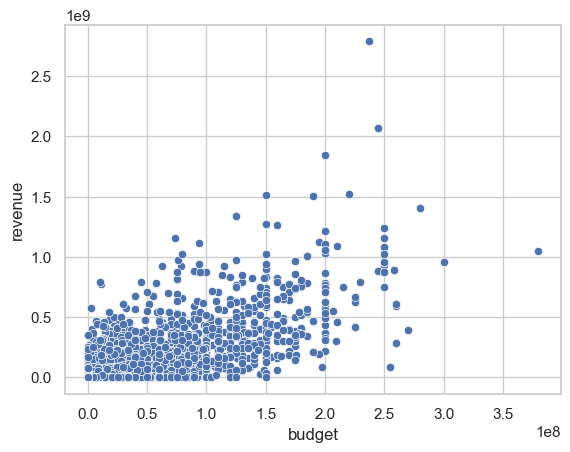

In [94]:
sns.scatterplot(data=df, x='budget', y='revenue')

<Axes: xlabel='popularity', ylabel='revenue'>

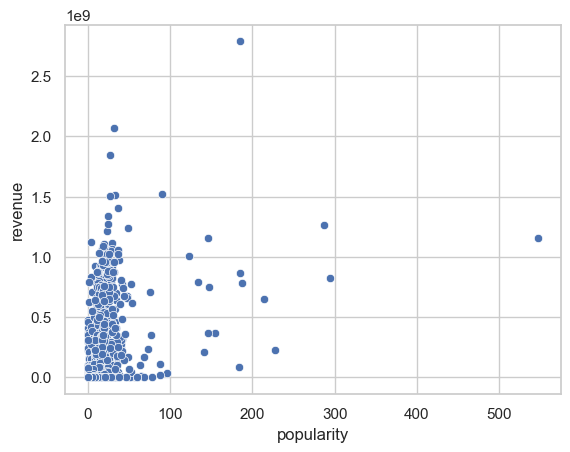

In [112]:
sns.scatterplot(data=df, x='popularity', y='revenue')

/var/folders/5b/cj7qp6dx0rb7yfz06c2zb7ww0000gn/T/ipykernel_23911/1918094112.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

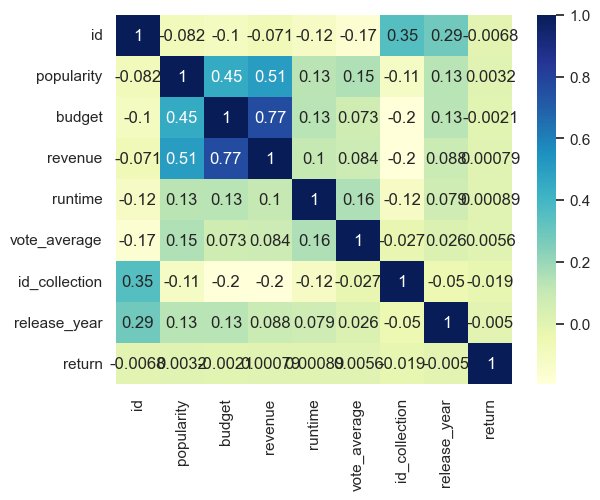

In [95]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

In [100]:
df.runtime.describe()

count    45130.000000
mean        94.181675
std         38.341059
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

### OURLIERS

(-50.0, 250.0)

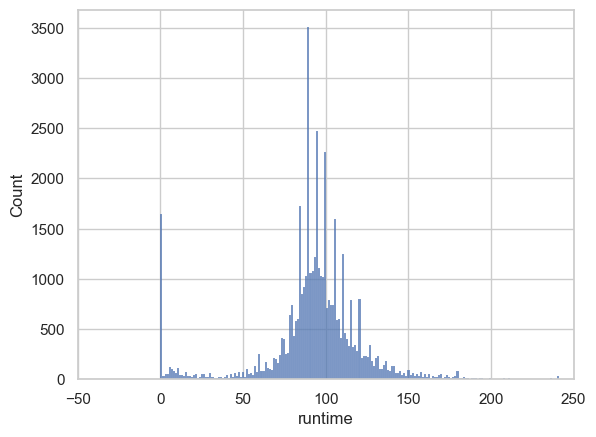

In [107]:
sns.histplot(df.runtime)
plt.gca().set_xlim([-50, 250])

In [117]:
df['runtime'] = df['runtime'].replace(0.0, np.nan)

(-50.0, 250.0)

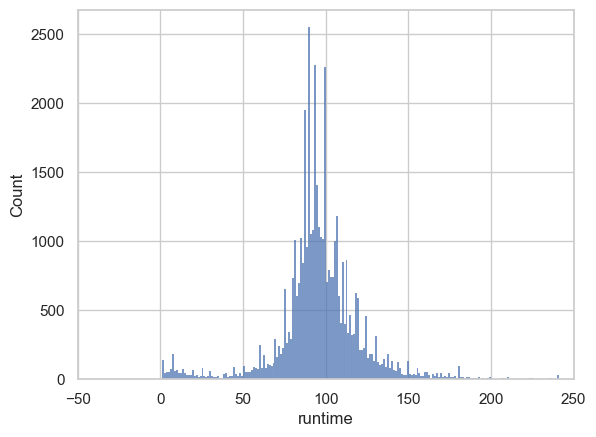

In [121]:
sns.histplot(df.runtime)
plt.gca().set_xlim([-50, 250])

(-5.0, 20.0)

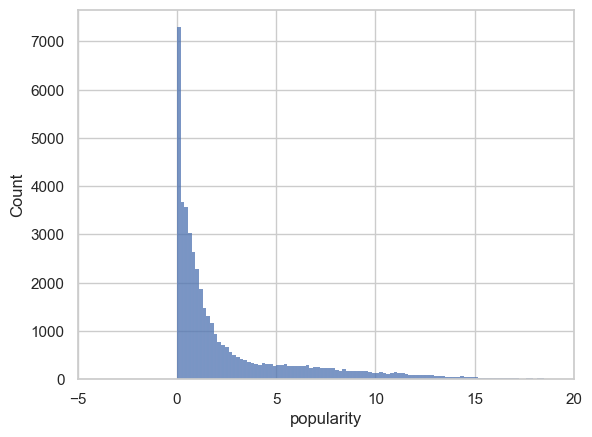

In [124]:
sns.histplot(df.popularity)
plt.gca().set_xlim([-5, 20])

<Axes: xlabel='vote_average', ylabel='Count'>

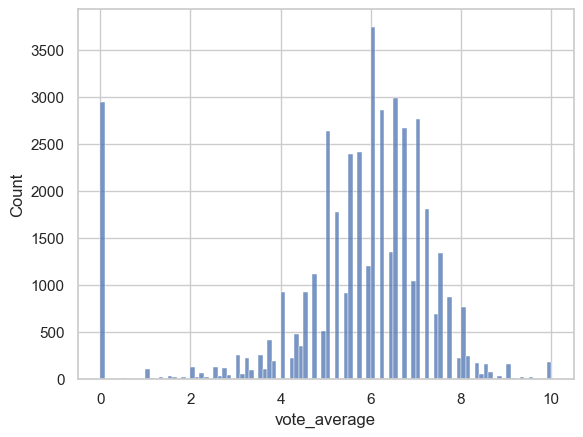

In [131]:
sns.histplot(df.vote_average)

In [134]:
df['vote_average'] = df['vote_average'].replace(0.0, np.nan)

<Axes: xlabel='vote_average', ylabel='Count'>

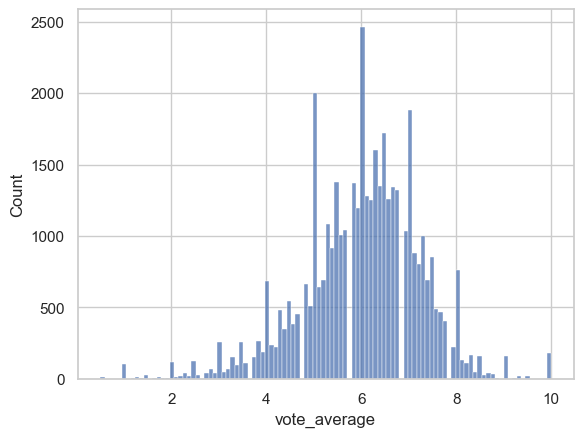

In [135]:
sns.histplot(df.vote_average)

In [139]:
dfa = df

In [140]:
df['budget'] = df['budget'].replace(0, np.nan)
df['revenue'] = df['revenue'].replace(0, np.nan)
df['return'] = df['return'].replace(0.00, np.nan)

<Axes: >

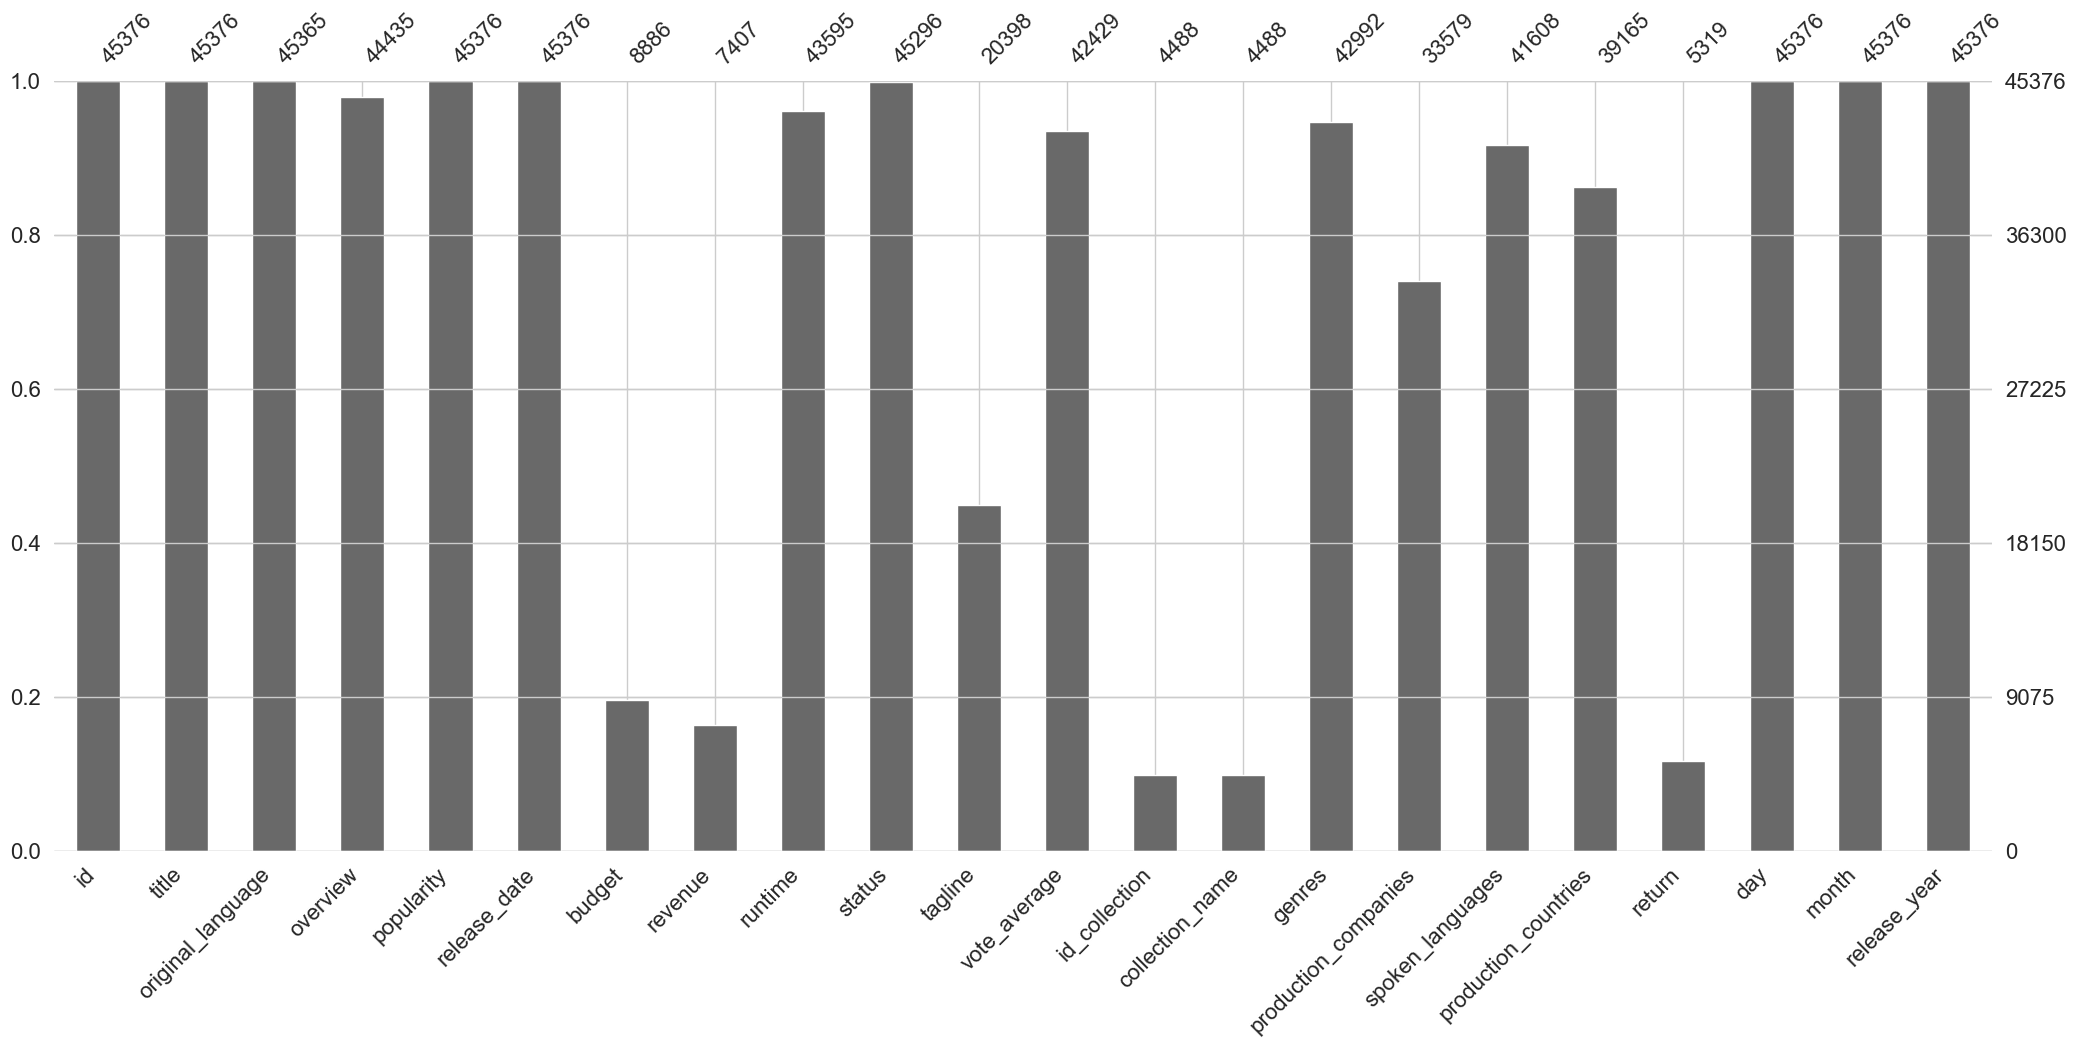

In [163]:
msno.bar(df)

<Axes: >

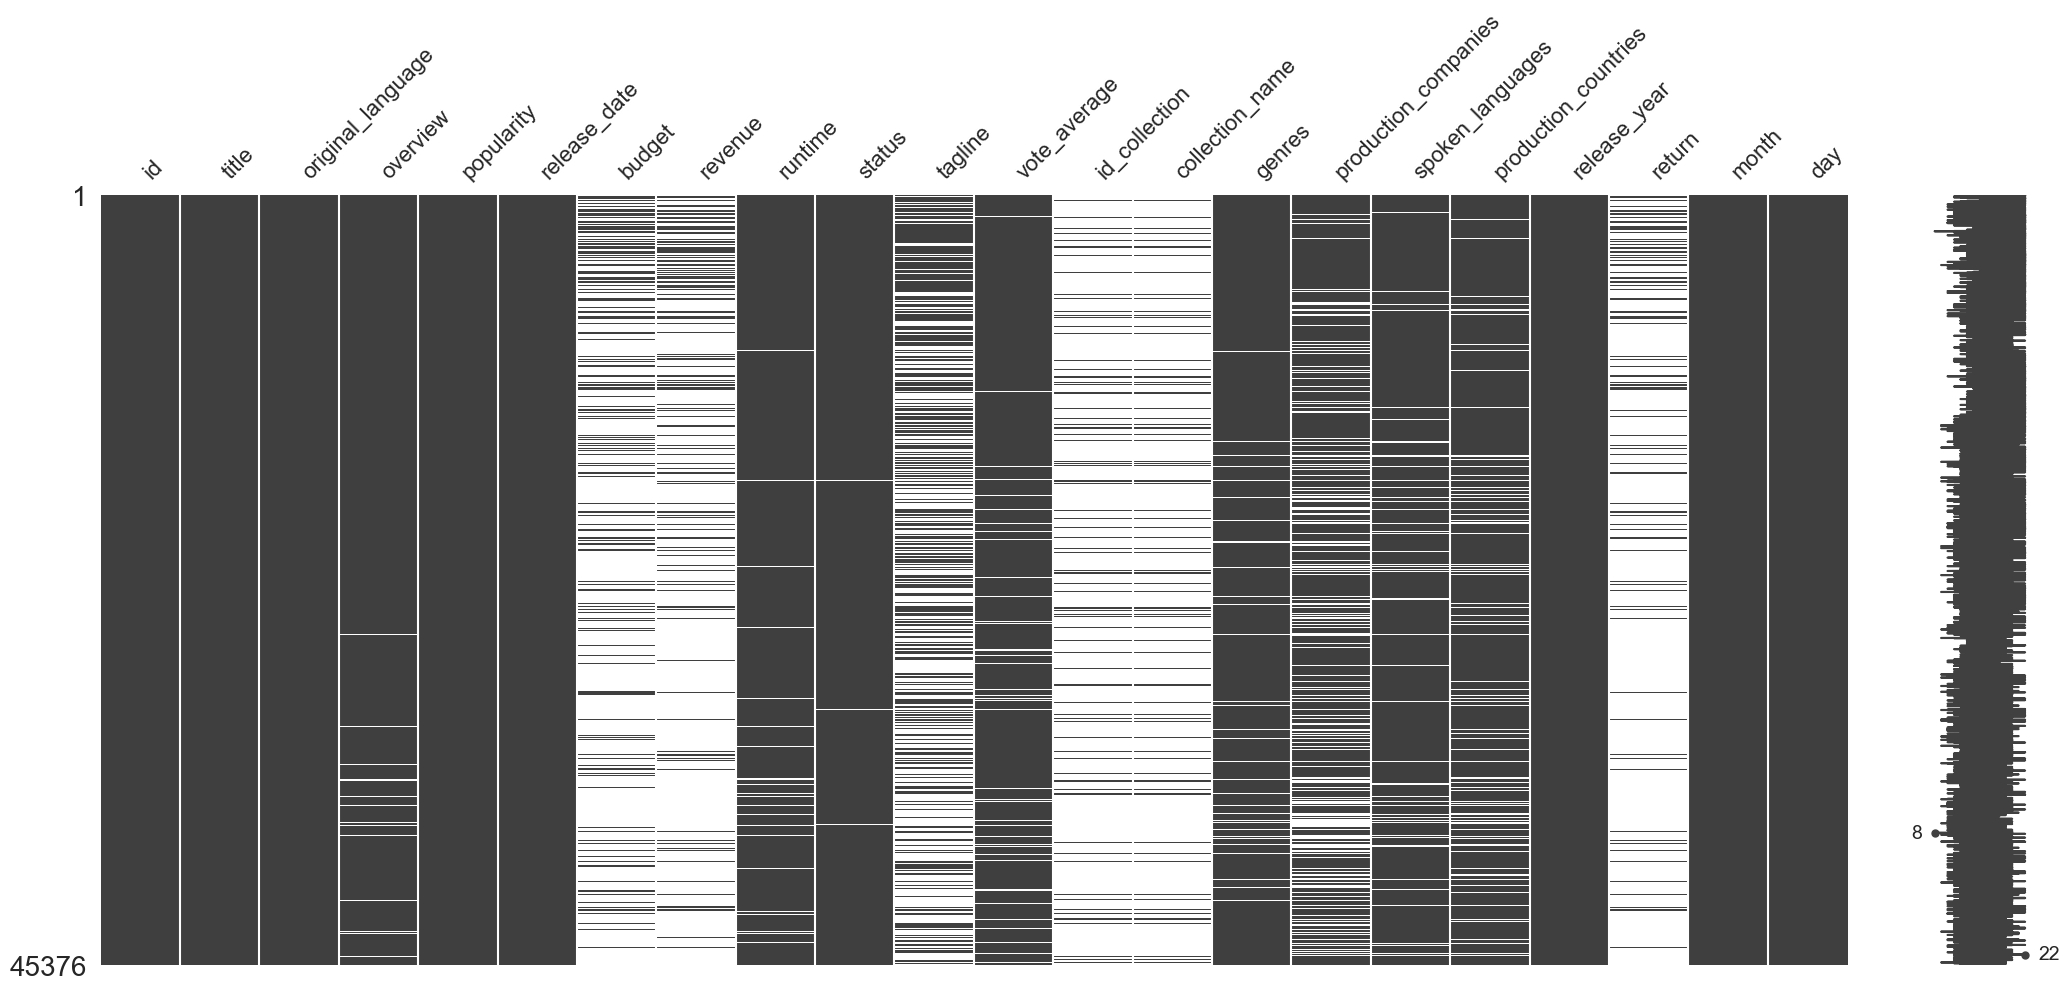

In [144]:
msno.matrix(df)

In [154]:
df.columns

Index(['id', 'title', 'original_language', 'overview', 'popularity',
       'release_date', 'budget', 'revenue', 'runtime', 'status', 'tagline',
       'vote_average', 'id_collection', 'collection_name', 'genres',
       'production_companies', 'spoken_languages', 'production_countries',
       'release_year', 'return', 'month', 'day'],
      dtype='object')

In [159]:
# Reorder columns
new_order = ['id', 'title', 'original_language', 'overview', 'popularity',
       'release_date', 'budget', 'revenue', 'runtime', 'status', 'tagline',
       'vote_average', 'id_collection', 'collection_name', 'genres',
       'production_companies', 'spoken_languages', 'production_countries',
       'return', 'day', 'month', 'release_year']
df = df.reindex(columns=new_order)

In [165]:
df.head(5)

,id,title,original_language,overview,popularity,release_date,budget,revenue,runtime,status,...,id_collection,collection_name,genres,production_companies,spoken_languages,production_countries,return,day,month,release_year
0,862,toy story,en,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,30000000.0,373554033.0,81.0,released,...,10194.0,toy story collection,"animation, comedy, family",pixar animation studios,en,us,12.45,monday,october,1995
1,8844,jumanji,en,when siblings judy and peter discover an encha...,17.015539,1995-12-15,65000000.0,262797249.0,104.0,released,...,NaN,NaN,"adventure, fantasy, family","tristar pictures, teitler film, interscope com...","en, fr",us,4.04,friday,december,1995
2,15602,grumpier old men,en,a family wedding reignites the ancient feud be...,11.712900,1995-12-22,NaN,NaN,101.0,released,...,119050.0,grumpy old men collection,"romance, comedy","warner bros., lancaster gate",en,us,NaN,friday,december,1995
3,31357,waiting to exhale,en,"cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,16000000.0,81452156.0,127.0,released,...,NaN,NaN,"comedy, drama, romance",twentieth century fox film corporation,en,us,5.09,friday,december,1995
4,11862,father of the bride part ii,en,just when george banks has recovered from his ...,8.387519,1995-02-10,NaN,76578911.0,106.0,released,...,96871.0,father of the bride collection,comedy,"sandollar productions, touchstone pictures",en,us,NaN,friday,february,1995


### WORD CLOUD

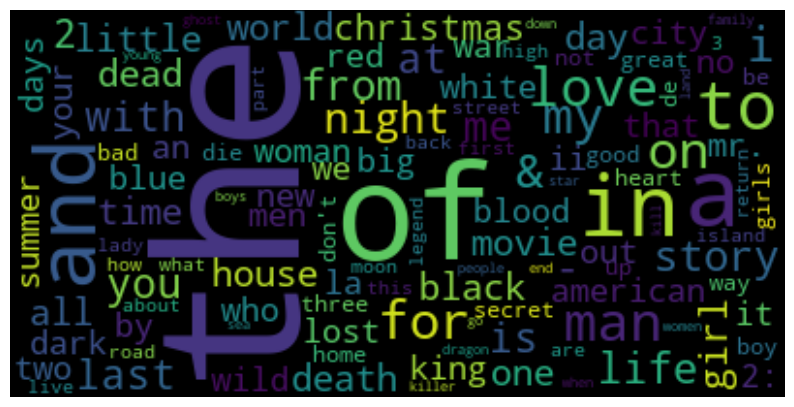

In [176]:
words = df['title'].str.split().explode()
word_counts = words.value_counts()
top_words = word_counts[word_counts >= 100]
wordcloud = WordCloud().generate_from_frequencies(top_words)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### WORDCLOUD WITH STOP WORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     http://nltk.github.com/nltk_data/...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ejerico/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


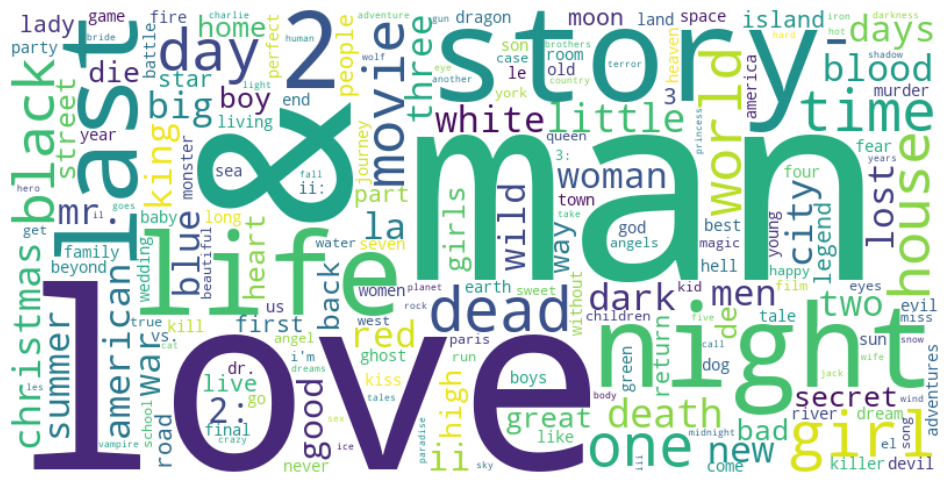

In [184]:
ssl._create_default_https_context = ssl._create_unverified_context
nltk.download('stopwords', 'http://nltk.github.com/nltk_data/')

# Download the list of stop words
nltk.download('stopwords')

# Get the stop words in English
stop_words = set(stopwords.words('english'))

# Split the text into words
words = df['title'].str.split().explode()

# Remove the stop words
filtered_words = [word for word in words if word.lower() not in stop_words]

# Count the occurrences of each word
word_counts = pd.Series(filtered_words).value_counts()

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [81]:
df.dtypes

id                        int64
title                    object
original_language        object
overview                 object
popularity              float64
release_date             object
budget                    int64
revenue                   int64
runtime                 float64
status                   object
tagline                  object
vote_average            float64
id_collection           float64
collection_name          object
genres                   object
production_companies     object
spoken_languages         object
production_countries     object
release_year              int64
return                  float64
month                    object
day                      object
dtype: object

In [164]:
# Save the DataFrame to a CSV file
df.to_csv('my_data.csv', index=False)